# New predictions    
  
In this noteboook we use the models we built in the previous notebook to make predictions on the MedChemExpress library, as well as Halicin and Abaucin
  


In [1]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats.mstats import gmean

import matplotlib.pyplot as plt
from itables import init_notebook_mode

from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

from dataset.dataset_representation import process_dataset, calc_descriptors


import matplotlib.pyplot as plt
import seaborn as sns

/home/roberto_olayo/miniconda3/envs/molclr/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Set up directories

In [2]:
MODEL_DIR = "../data/03.model_evaluation/"
PROCESSED_DATA_DIR = "../data/01.prepare_training_data/"
RAW_DATA_DIR = "../raw_data/"

OUTPUT_DIR = "../data/04.new_predictions"
os.makedirs(OUTPUT_DIR, exist_ok=True)

## Read models

In [3]:
# MolE model
with open(os.path.join(MODEL_DIR, "MolE-XGBoost-08.03.2024_14.20.pkl"), "rb") as file:
    mole_model = pickle.load(file)

# ECFP4 model
with open(os.path.join(MODEL_DIR, "ecfp4-XGBoost-08.03.2024_14.20.pkl"), "rb") as file:
    ecfp4_model = pickle.load(file)

# ChemDesc model
with open(os.path.join(MODEL_DIR, "chemDesc-XGBoost-08.03.2024_14.20.pkl"), "rb") as file:
    chemDesc_model = pickle.load(file)

# Read optimized parameters
optimized_parameters = pd.read_csv(os.path.join(MODEL_DIR, "optimal_thresholds.tsv.gz"), sep='\t')

## Prepare representations for Halicin and Abaucin

In [6]:
# Create the dictionary with SMILES
novel_abx = {"compound": ["Halicin", "Abaucin"],
            "pchem_id": [11837140, 10000456],
             "pchem_canonical_smiles": ["C1=C(SC(=N1)SC2=NN=C(S2)N)[N+](=O)[O-]", "C1CN(CCC12C3=CC=CC=C3NC(=O)O2)CCC4=CC=C(C=C4)C(F)(F)F"],
             "pchem_isomeric_smiles": ["C1=C(SC(=N1)SC2=NN=C(S2)N)[N+](=O)[O-]", "C1CN(CCC12C3=CC=CC=C3NC(=O)O2)CCC4=CC=C(C=C4)C(F)(F)F"]}

pd.DataFrame(novel_abx).to_csv(os.path.join(OUTPUT_DIR, "novel_abx_smiles.tsv.gz"), sep='\t')

In [9]:
mole_novel = process_dataset(dataset_path = os.path.join(OUTPUT_DIR, "novel_abx_smiles.tsv.gz"), 
                                                  pretrain_architecture = "gin_concat", 
                                                  pretrained_model = "model_ginconcat_btwin_100k_d8000_l0.0001", 
                                                  split_data=False,
                                                  smile_column_str = "pchem_canonical_smiles", 
                                                  id_column_str = "compound")

#mole_novel.to_csv(os.path.join(OUTPUT_DIR, "MolE_novel_abx.tsv.gz"), sep='\t')

Representation dimension (1000) - Embedding dimension (8000)
../pretrained_model/model_ginconcat_btwin_100k_d8000_l0.0001/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnns.3.mlp.1.wei

## Prepare representations for MedChemExpress

In [3]:
mole_mce = process_dataset(dataset_path = os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), 
                                                  pretrain_architecture = "gin_concat", 
                                                  pretrained_model = "model_ginconcat_btwin_100k_d8000_l0.0001", 
                                                  split_data=False,
                                                  smile_column_str = "rdkit_no_salt", 
                                                  id_column_str = "Catalog Number")

#mole_mce.to_csv(os.path.join(OUTPUT_DIR, "MolE_representation_medchemexpress.tsv.gz"), sep='\t')

Representation dimension (1000) - Embedding dimension (8000)
../pretrained_model/model_ginconcat_btwin_100k_d8000_l0.0001/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnns.3.mlp.1.wei

In [4]:
ecfp4_mce = process_dataset(dataset_path = os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), 
                            pretrain_architecture = "ECFP4", 
                            pretrained_model = None, 
                            split_data=False,
                            smile_column_str = "rdkit_no_salt", 
                            id_column_str = "Catalog Number")

#ecfp4_mce.to_csv(os.path.join(OUTPUT_DIR, "ecfp4_representation_medchemexpress.tsv.gz"), sep='\t')

In [4]:
chemdesc_mce = process_dataset(dataset_path = os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), 
                            pretrain_architecture = "ChemDesc", 
                            pretrained_model = None, 
                            split_data=False,
                            smile_column_str = "pchem_isomeric_smile", 
                            id_column_str = "Catalog Number")

#chemdesc_mce.to_csv(os.path.join(OUTPUT_DIR, "chemDesc_representation_medchemexpress.tsv.gz"), sep='\t')

Could not compute descriptors for HY-B1831A
Could not compute descriptors for HY-N0239
Could not compute descriptors for HY-15991
Could not compute descriptors for HY-15664
Could not compute descriptors for HY-13534A
Could not compute descriptors for HY-13665
Could not compute descriptors for HY-13673A
Could not compute descriptors for HY-N2031
Could not compute descriptors for HY-N1981
Could not compute descriptors for HY-P0163
Could not compute descriptors for HY-B2136
Could not compute descriptors for HY-13581A
Could not compute descriptors for HY-17565
Could not compute descriptors for HY-112530
Could not compute descriptors for HY-P0009A
Could not compute descriptors for HY-113498
Could not compute descriptors for HY-17565A
Could not compute descriptors for HY-B0108
Could not compute descriptors for HY-17586
Could not compute descriptors for HY-16168A
Could not compute descriptors for HY-107799
Could not compute descriptors for HY-P0059
Could not compute descriptors for HY-N0062
C

## Predictions for novel antibiotics

In [4]:
# Results from screening
maier_screen = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, "maier_screening_results.tsv.gz"), sep='\t', index_col=0)

# Additional information for strains
maier_strains = pd.read_excel(os.path.join(RAW_DATA_DIR, "maier_microbiome", "strain_info_SF2.xlsx"),
                             skiprows=[0,1, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], 
                             index_col="NT data base")

# Additional information on chemical library
maier_library = pd.read_excel(os.path.join(RAW_DATA_DIR, "maier_microbiome", "chem_library_info_SF1.xlsx"))

# Prepare the OHE of the strains
def prep_ohe(categories):

    # Prepare OHE
    ohe = OneHotEncoder(sparse=False)

    # Fit OHE
    ohe.fit(pd.DataFrame(categories))

    # Prepare OHE
    cat_ohe = pd.DataFrame(ohe.transform(pd.DataFrame(categories)), columns=categories, index=categories)

    return cat_ohe

# Prepare the input for the prediction
def add_strains(chemfeats_df, ohe_df):

    # Prepare chemical features
    chemfe = chemfeats_df.reset_index().rename(columns={"index": "chem_id"})
    chemfe["chem_id"] = chemfe["chem_id"].astype(str) 

    # Prepare OHE
    sohe = ohe_df.reset_index().rename(columns={"index": "strain_name"})

    # Cartesian product merge
    xpred = chemfe.merge(sohe, how="cross")
    xpred["pred_id"] = xpred["chem_id"].str.cat(xpred["strain_name"], sep=":")

    xpred = xpred.set_index("pred_id")
    xpred = xpred.drop(columns=["chem_id", "strain_name"])

    # Make sure correct number of rows
    assert xpred.shape[0] == (chemfeats_df.shape[0] * ohe_df.shape[0])

    # Make sure correct number of features
    assert xpred.shape[1] == (chemfeats_df.shape[1] + ohe_df.shape[1])
    
    return xpred

# Function to make predictions
def make_predictions(model, chemrep_df, score_threshold, strain_categories = maier_screen.columns):

    # Prepare the input for the prediction
    strain_ohe = prep_ohe(strain_categories)
    x_input = add_strains(chemrep_df, strain_ohe)

    # Make the prediction
    y_pred = model.predict_proba(x_input)[:,1]

    # Prepare the output
    pred_df = pd.DataFrame(y_pred, columns=["pred_score"], index=x_input.index)

    # Apply the threshold
    pred_df["pred_label"] = pred_df["pred_score"].apply(lambda x: 1 if x >= score_threshold else 0)

    # Prepare the output
    pred_df = pred_df.reset_index()
    pred_df["chem_id"] = pred_df["pred_id"].str.split(":", expand=True)[0]
    pred_df["strain_name"] = pred_df["pred_id"].str.split(":", expand=True)[1]
    pred_df = pred_df.drop(columns=["pred_id"])

    return pred_df

/home/roberto_olayo/miniconda3/envs/molclr/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [36]:
mole_halicin_predictions = make_predictions(mole_model, mole_novel, optimized_parameters.loc[(optimized_parameters["representation"]== "MolE") &
                                                                                            (optimized_parameters["score_type"]== "optimized"), "threshold"].values[0])

<AxesSubplot:xlabel='strain_name', ylabel='chem_id'>

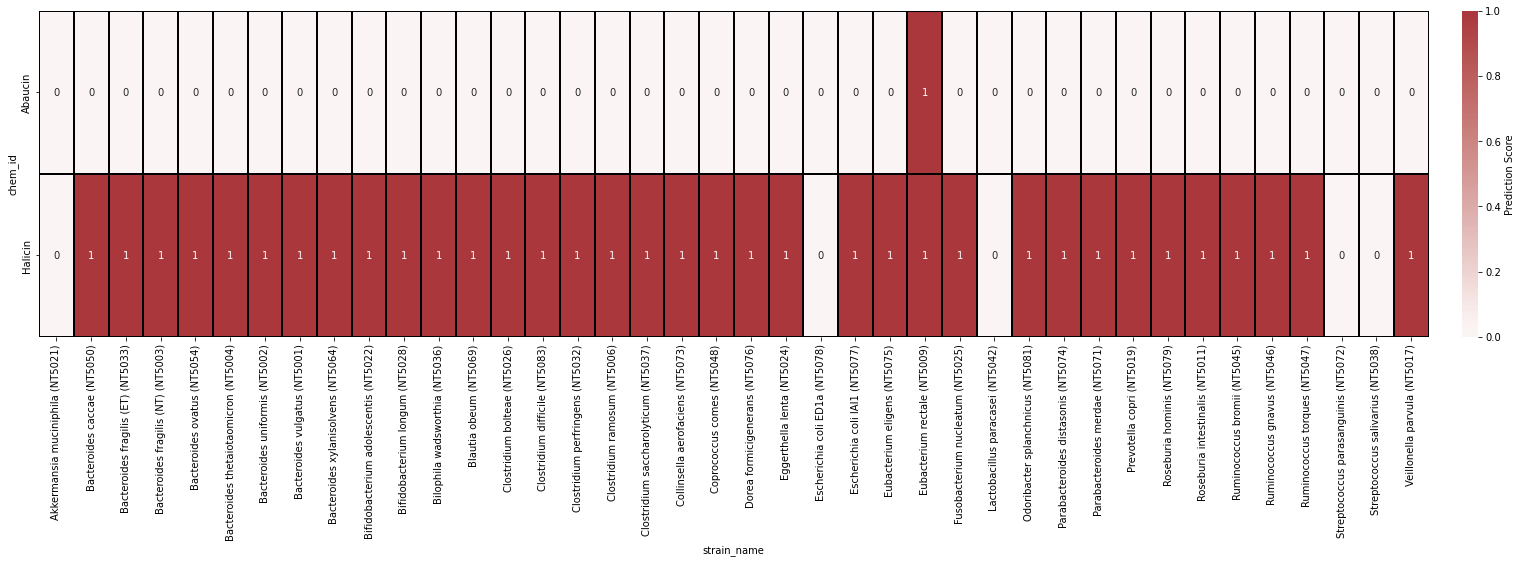

In [37]:
mole_halicin_predictions = mole_halicin_predictions.pivot_table(index="chem_id", columns="strain_name", values="pred_label")


plt.figure(figsize=(30, 6))

sns.heatmap(mole_halicin_predictions, cmap="vlag", robust=False, center=0, 
            linewidths=0.1, linecolor="black", annot=True,
            cbar_kws={"label": "Prediction Score", "pad": 0.02})

## Predictions for MedChemExpress

In [5]:
# Read the chemical library metadata

medchemexp_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "medchemexpress", "chemical_library_cleaned.tsv.gz"), sep='\t', index_col=0)
medchemexp_df.shape

(3286, 15)

### Remove chemicals that are present in the Maier dataset

In [6]:
# Function to simplify the chemical names
def simplified_names_chemlibrary(original_name):
    
    # Remove additional information from name 
    name = original_name.split(" (")[0]
    name = name.split(" [")[0]
    name = name.rstrip()
    
    name = name.lower()
    
    
    return name

# Simplify the product names
medchemexp_df["simple_name"] = medchemexp_df["ProductName"].apply(simplified_names_chemlibrary)

# Lowercase the names in the maier data
maier_library["chem_name_lower"] = maier_library["chemical name"].apply(lambda x: x.lower())

medchemexp_df_filtnames = medchemexp_df.loc[~medchemexp_df["simple_name"].isin(maier_library.chem_name_lower.tolist())]
medchemexp_df_filtnames.shape

(2746, 16)

Also remove chemicals with overlapping ATC codes

In [7]:
# Gather all Maier atc codes
maier_atc = [c for a in maier_library["ATC codes"].unique() for c in a.split(" ")]

# Function to detect ATC overlap
def atc_in_maier(atc_str, maier_atc_list=maier_atc):
    
    # check if atc code is in the maier dataset
    if any([x for x in atc_str.split(":") if x in maier_atc_list]):
        return True
    else:
        return False
    
# Filter chemicals with overlapping ATC codes
medchemexp_df_filtatc = medchemexp_df_filtnames.loc[~medchemexp_df_filtnames["atc_code"].apply(atc_in_maier)]
medchemexp_df_filtatc.shape

(2332, 16)

In [8]:
# Other chemicals that are in the Maier dataset
overlap_catnums = ['HY-B1246', 'HY-30234A', 'HY-B0463', 'HY-W010832', 'HY-B1320', 'HY-13578', 'HY-14447', 'HY-12857']

# Filter the chemicals
medchemexp_df_filttotal = medchemexp_df_filtatc.loc[~medchemexp_df_filtatc["Catalog Number"].isin(overlap_catnums)]
medchemexp_df_filttotal.shape

(2324, 16)

In [9]:
print(f"{medchemexp_df.shape[0] - medchemexp_df_filttotal.shape[0]} chemicals removed")

962 chemicals removed


### Make predictions

In [22]:
# Read MolE representation
mole_mce = pd.read_csv(os.path.join(OUTPUT_DIR, "MolE_representation_medchemexpress.tsv.gz"), sep='\t', index_col=0)

# Make predictions
mole_mce_predictions = make_predictions(mole_model, 
                mole_mce.loc[medchemexp_df_filttotal["Catalog Number"]], 
                optimized_parameters.loc[(optimized_parameters["representation"]== "MolE") &
                                         (optimized_parameters["score_type"]== "optimized"), "threshold"].values[0])

## Analyze predictions

In [75]:
# Add gram stain information
def gram_stain(label_df, strain_info_df=maier_strains):

    # Create copy of the label dataframe
    df_label = label_df.copy()
    
    # Gather NT number
    df_label["nt_number"] = df_label["strain_name"].apply(lambda x: re.search(".*?\((NT\d+)\)", x).group(1))

    # Create Gram strain dict
    gram_dict = strain_info_df[["Gram stain"]].to_dict()["Gram stain"]

    # Add stain information
    df_label["gram_stain"] = df_label["nt_number"].apply(gram_dict.get)

    return df_label


def aggregate_predictions(pred_df):

    # Total number of inhibited strains
    nkill_total = pred_df.groupby("chem_id")[["pred_label"]].sum().rename(columns={"pred_label": "nk_total"})

    # Total number of inhibited strains by gram stain
    nkill_gram = pred_df.groupby(["chem_id", "gram_stain"])["pred_label"].sum().unstack().rename(columns={"negative": "nk_gnegative",
                                                                                                            "positive": "nk_gpositive"})

    # Antimicrobial score
    apscore_total = pred_df.groupby("chem_id")["pred_score"].apply(gmean).to_frame().rename(columns={"pred_score": "apscore_total"})
    apscore_total["apscore_total"] = np.log(apscore_total["apscore_total"])

    # Antimicrobial score by gram stain
    apscore_gram = pred_df.groupby(["chem_id", "gram_stain"])["pred_score"].apply(gmean).unstack().rename(columns={"negative": "apscore_gnegative",
                                                                                                         "positive": "apscore_gpositive"})
    apscore_gram["apscore_gnegative"] = np.log(apscore_gram["apscore_gnegative"])
    apscore_gram["apscore_gpositive"] = np.log(apscore_gram["apscore_gpositive"])


    # Merge the results
    agg_pred = nkill_total.join(nkill_gram).join(apscore_total).join(apscore_gram)

    return agg_pred

def inform_predictions(pred_df, metadata_df = medchemexp_df_filttotal, strain_info_df=maier_strains):

    # Add gram stain information
    pred_df_gram = gram_stain(pred_df, strain_info_df)

    # Aggregate prediction information
    agg_pred = aggregate_predictions(pred_df_gram)
    agg_pred = agg_pred.reset_index()

    # Add antibiotic information
    abx_dict = metadata_df[["Catalog Number", "final_abx"]].set_index("Catalog Number").to_dict()["final_abx"]
    agg_pred["antibiotic"] = agg_pred["chem_id"].apply(abx_dict.get)

    return agg_pred


In [76]:
mole_mce_info = inform_predictions(mole_mce_predictions)

<AxesSubplot:xlabel='nk_total', ylabel='apscore_total'>

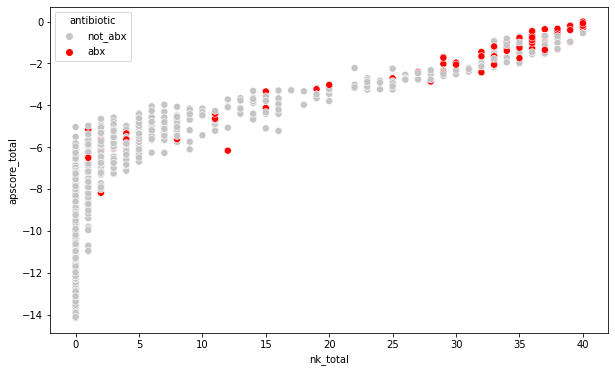

In [62]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=mole_mce_info, y="apscore_total", x="nk_total", hue="antibiotic", 
                palette={"abx": "red", "not_abx": "#C5C5C5"}, s=50)

<AxesSubplot:xlabel='apscore_gnegative', ylabel='apscore_gpositive'>

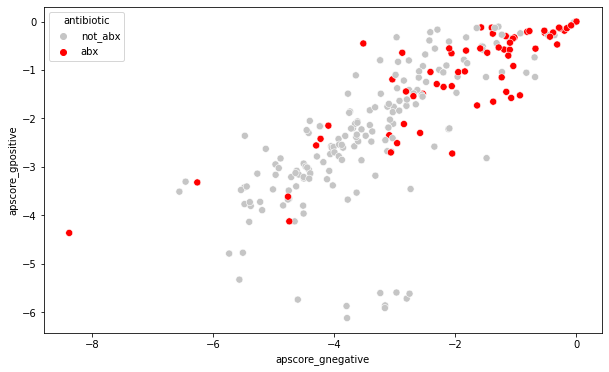

In [65]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=mole_mce_info.loc[mole_mce_info["nk_total"] >= 10], y="apscore_gpositive", x="apscore_gnegative", hue="antibiotic", 
                palette={"abx": "red", "not_abx": "#C5C5C5"}, s=50)

## Prepare output

In [95]:
# Add metadata
mole_mce_metadata = mole_mce_info.set_index("chem_id").join(medchemexp_df_filttotal.set_index("Catalog Number")[["ProductName", "Biological Activity"]])
mole_mce_metadata = mole_mce_metadata.reset_index().rename(columns={"chem_id": "Catalog Number"}).sort_values("nk_total", ascending=False)


# Isolate over 10
mole_mce_over10 = mole_mce_metadata.loc[mole_mce_metadata["nk_total"] >= 10]

# Gather the scores
mole_scores_table = mole_mce_predictions.pivot_table(index="chem_id", columns="strain_name", values="pred_score")

In [100]:
with pd.ExcelWriter(os.path.join(OUTPUT_DIR, "mole_mce_predictions.xlsx")) as writer:
    mole_mce_metadata.to_excel(writer, sheet_name="mole_prediction_overview", index=False)
    mole_mce_over10.to_excel(writer, sheet_name="mole_over10", index=False)
    mole_scores_table.to_excel(writer, sheet_name="mole_scores", index=True)    